<a href="https://colab.research.google.com/github/valerian720/histogram_processing/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. выбрать два изображения
2. перевести изображения в чб
3. получить гистограммы изображений
4. провести нормализацию гистограмм
5. провести эквализацию гистограмм
6. провести преобразование гистограммы по произвольно заданной функции

In [ ]:
from skimage import color, data, io
# библиотека для работы с изображениями
# https://scikit-image.org/
import matplotlib
from matplotlib import pyplot as plt


In [ ]:
import numpy as np

In [ ]:
def print_pic(pic):
  io.imshow(pic)
  plt.show()

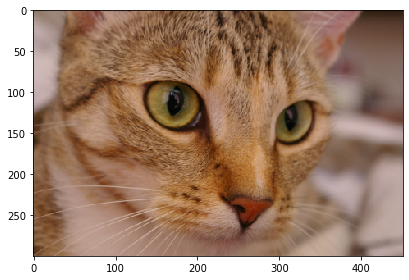

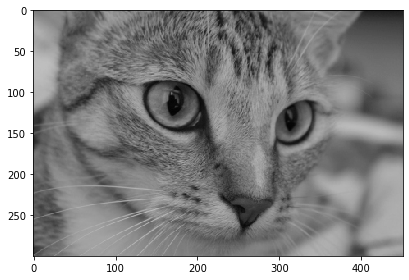

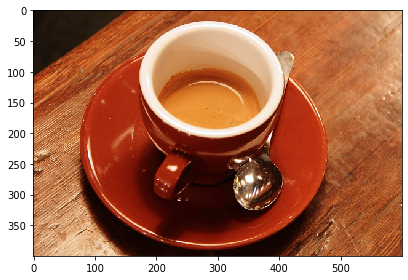

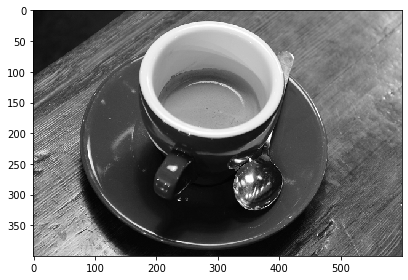

In [ ]:
# подгрузка картинок по тематике дом из библиотеки
print_pic(data.chelsea())
pic_high_detail = color.rgb2gray(data.chelsea())
print_pic(pic_high_detail)

print_pic(data.coffee())
pic_low_detail = color.rgb2gray(data.coffee())
print_pic(pic_low_detail)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float, img_as_ubyte
from skimage import exposure

In [ ]:
matplotlib.rcParams['font.size'] = 8
# https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

In [ ]:
def plot_img(image, bins=256):
    # доп вывод показа изображения
    print_pic(image)
    #

    image = img_as_float(image)

    # настройка гистограммы
    plt.hist(image.ravel(), bins=bins, histtype='step', color='black')
    plt.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    plt.xlabel('Pixel intensity')
    plt.xlim(0, 1)
    plt.yticks([])

    plt.show()

In [ ]:
def analyze_image(img):
  # вычисление изображений
  # Contrast stretching
  p2, p98 = np.percentile(img, (2, 98))
  img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

  # Equalization
  img_eq = exposure.equalize_hist(img)

  # Adaptive Equalization
  img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

  # получить гистограммы изображений
  print("original")
  plot_img(img)
  calculate_delta_lmax_lmin(img)
  print("Contrast stretching")
  plot_img(img_rescale)
  print("Histogram equalization")
  plot_img(img_eq)
  print("Adaptive equalization")
  plot_img(img_adapteq)

original


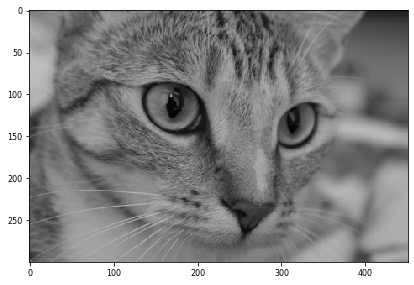

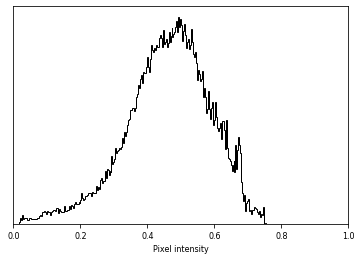

Contrast stretching


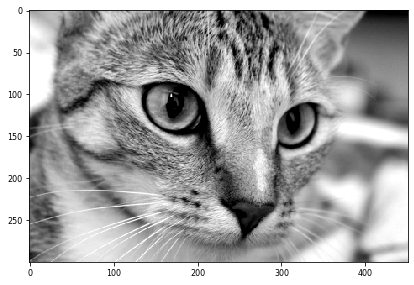

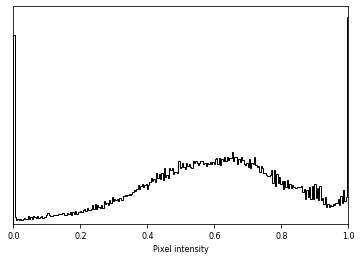

Histogram equalization


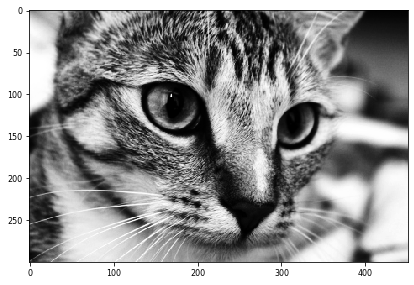

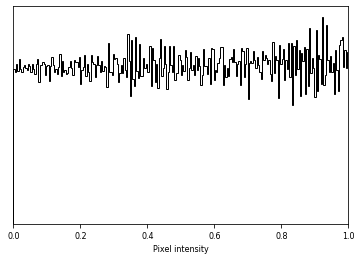

Adaptive equalization


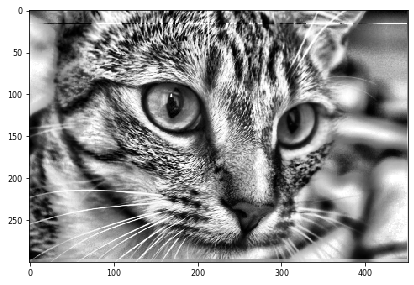

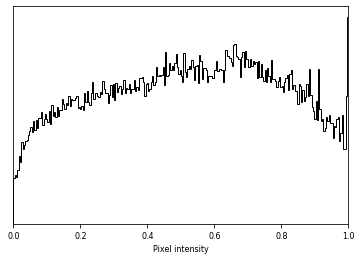

In [ ]:
analyze_image(pic_high_detail)

original


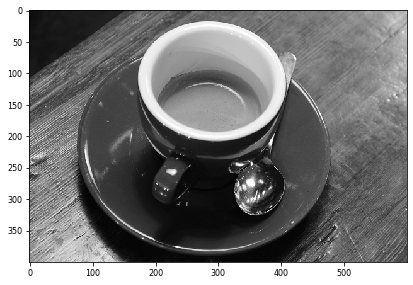

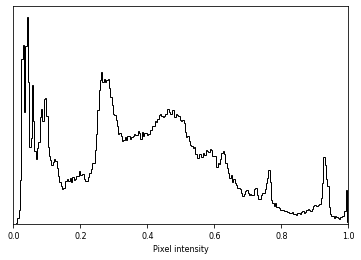

Contrast stretching


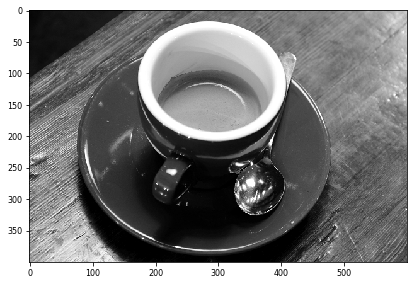

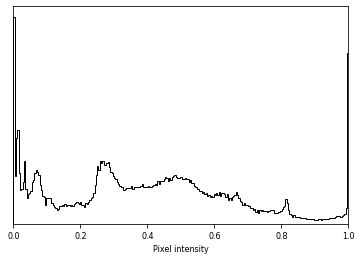

Histogram equalization


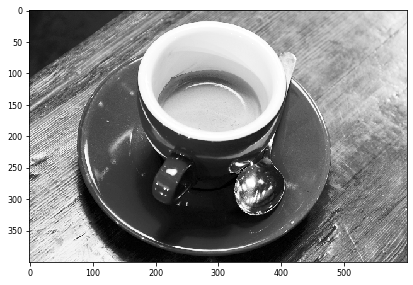

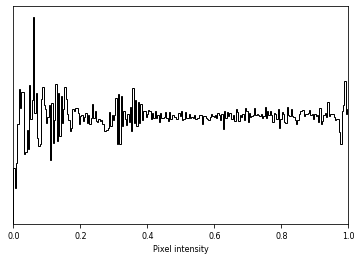

Adaptive equalization


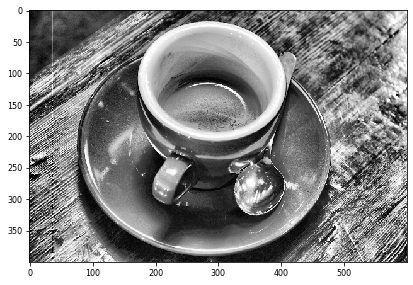

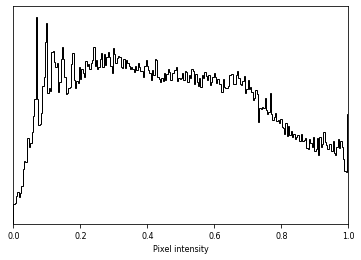

In [ ]:
analyze_image(pic_low_detail)

In [ ]:
import math

In [ ]:
def setup_plt_hyperparam(max_val=255):
  axes = plt.gca()
  axes.set_xlim([0,max_val])
  axes.set_ylim([0,max_val])
  
def print_plot(shader_func):
  # работа в функции идет со значениями от 0 до 1
  # bruh
  max_len = 1000

  tmp_range = [(1/max_len) * i for i in range(0, max_len)] # создание массива значений от 0 до 1 с шагом 1/max_len
  tmp = [0]*max_len # обявление выходного массива нужной длины

  for i in range(len(tmp_range)): # применение "шейдера"
    tmp[i] = shader_func(tmp_range[i])

  setup_plt_hyperparam(1)
  plt.plot(tmp_range, tmp) # 0 1 (более точно отображает применяемую функцию)
  plt.show()

  setup_plt_hyperparam()
  plt.plot(img_as_ubyte(tmp_range), img_as_ubyte(tmp)) # 0 255
  plt.show()

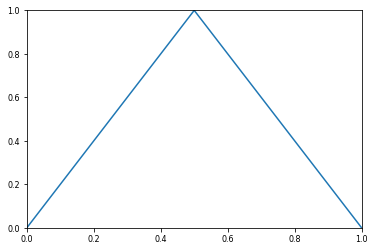

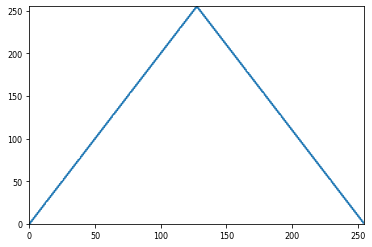

In [ ]:
# подготовка катомной функции для изменения гистограммы
def triangular_func(val):
  ret = 0
  if(val<=.5):
    ret = val*2
  else:
    ret = 2-val*2
  return ret

print_plot(triangular_func)

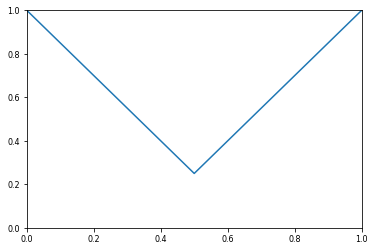

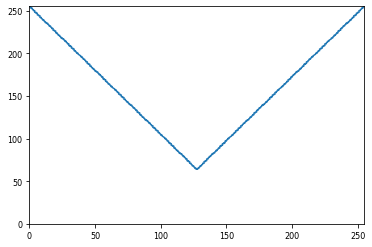

In [ ]:
def triangular_v_func(val):
  ret = 0
  if(val<=.5):
    ret = 1-val*1.5
  else:
    ret = val*1.5-.5
  return ret

print_plot(triangular_v_func)

In [ ]:
#################################################################################

In [ ]:
def calculate_gist_from_img(img, max_val = 256):
  ret_gist = [0]* max_val
  for i in range(len(img)):
    for j in range(len(img[0])):
      lightness = round((max_val-1)*img[i][j])
      ret_gist[lightness] +=1
  return ret_gist

hist_pic_high_detail = calculate_gist_from_img(pic_high_detail)
print(hist_pic_high_detail) 

[0, 0, 0, 0, 3, 26, 42, 60, 51, 60, 43, 35, 42, 46, 40, 50, 42, 46, 51, 51, 70, 77, 112, 114, 101, 90, 118, 106, 92, 99, 114, 124, 118, 138, 122, 123, 111, 124, 97, 144, 131, 118, 131, 153, 169, 168, 171, 171, 197, 173, 188, 195, 278, 228, 217, 257, 247, 281, 274, 274, 278, 282, 297, 316, 305, 345, 354, 393, 385, 398, 471, 462, 463, 450, 484, 582, 562, 584, 662, 654, 682, 672, 674, 778, 767, 807, 819, 914, 982, 1013, 1038, 1041, 1037, 1118, 1185, 1232, 1294, 1333, 1326, 1345, 1335, 1422, 1472, 1436, 1402, 1612, 1618, 1593, 1561, 1643, 1561, 1702, 1722, 1646, 1711, 1677, 1601, 1685, 1648, 1697, 1777, 1713, 1721, 1782, 1771, 1803, 1850, 1815, 1836, 1703, 1784, 1733, 1617, 1656, 1664, 1661, 1703, 1571, 1519, 1491, 1397, 1313, 1335, 1329, 1254, 1221, 1189, 1068, 1078, 1104, 1053, 1037, 992, 994, 1016, 961, 853, 836, 874, 886, 898, 834, 840, 691, 617, 534, 510, 537, 552, 566, 552, 733, 760, 602, 399, 237, 206, 167, 202, 187, 137, 101, 112, 139, 148, 132, 104, 92, 52, 111, 118, 33, 5, 1, 0, 

In [ ]:
def calculate_cummulative_hist(input_hist):
  tmp_val = 0
  ret_hist = input_hist.copy()
  for i in range(len(ret_hist)):
    tmp_val += ret_hist[i]
    ret_hist[i] = tmp_val
  return ret_hist

hist_cummulative_pic_high_detail = calculate_cummulative_hist(hist_pic_high_detail)
print(hist_cummulative_pic_high_detail)


[0, 0, 0, 0, 3, 29, 71, 131, 182, 242, 285, 320, 362, 408, 448, 498, 540, 586, 637, 688, 758, 835, 947, 1061, 1162, 1252, 1370, 1476, 1568, 1667, 1781, 1905, 2023, 2161, 2283, 2406, 2517, 2641, 2738, 2882, 3013, 3131, 3262, 3415, 3584, 3752, 3923, 4094, 4291, 4464, 4652, 4847, 5125, 5353, 5570, 5827, 6074, 6355, 6629, 6903, 7181, 7463, 7760, 8076, 8381, 8726, 9080, 9473, 9858, 10256, 10727, 11189, 11652, 12102, 12586, 13168, 13730, 14314, 14976, 15630, 16312, 16984, 17658, 18436, 19203, 20010, 20829, 21743, 22725, 23738, 24776, 25817, 26854, 27972, 29157, 30389, 31683, 33016, 34342, 35687, 37022, 38444, 39916, 41352, 42754, 44366, 45984, 47577, 49138, 50781, 52342, 54044, 55766, 57412, 59123, 60800, 62401, 64086, 65734, 67431, 69208, 70921, 72642, 74424, 76195, 77998, 79848, 81663, 83499, 85202, 86986, 88719, 90336, 91992, 93656, 95317, 97020, 98591, 100110, 101601, 102998, 104311, 105646, 106975, 108229, 109450, 110639, 111707, 112785, 113889, 114942, 115979, 116971, 117965, 118981, 1

In [ ]:
def calculate_target_gistogramm(target_func, size, koef=4.15):
  return [int(target_func(x/size)*(size*koef)) for x in range(size)]
print(calculate_target_gistogramm(triangular_func, len(hist_cummulative_pic_high_detail)))

[0, 8, 16, 24, 33, 41, 49, 58, 66, 74, 83, 91, 99, 107, 116, 124, 132, 141, 149, 157, 166, 174, 182, 190, 199, 207, 215, 224, 232, 240, 249, 257, 265, 273, 282, 290, 298, 307, 315, 323, 332, 340, 348, 356, 365, 373, 381, 390, 398, 406, 415, 423, 431, 439, 448, 456, 464, 473, 481, 489, 498, 506, 514, 522, 531, 539, 547, 556, 564, 572, 581, 589, 597, 605, 614, 622, 630, 639, 647, 655, 664, 672, 680, 688, 697, 705, 713, 722, 730, 738, 747, 755, 763, 771, 780, 788, 796, 805, 813, 821, 830, 838, 846, 854, 863, 871, 879, 888, 896, 904, 913, 921, 929, 937, 946, 954, 962, 971, 979, 987, 996, 1004, 1012, 1020, 1029, 1037, 1045, 1054, 1062, 1054, 1045, 1037, 1029, 1020, 1012, 1004, 996, 987, 979, 971, 962, 954, 946, 937, 929, 921, 913, 904, 896, 888, 879, 871, 863, 854, 846, 838, 830, 821, 813, 805, 796, 788, 780, 771, 763, 755, 747, 738, 730, 722, 713, 705, 697, 688, 680, 672, 664, 655, 647, 639, 630, 622, 614, 605, 597, 589, 581, 572, 564, 556, 547, 539, 531, 522, 514, 506, 498, 489, 481, 473,

In [ ]:
# вычислить кумулитивную гистограмму оригинального изображения
print(hist_cummulative_pic_high_detail)
# вычислить целевую кумулитивную гистограмму изображения донора
hist_cummulative_target = calculate_cummulative_hist(calculate_target_gistogramm(triangular_func, len(hist_cummulative_pic_high_detail)))

print(hist_cummulative_target)



[0, 0, 0, 0, 3, 29, 71, 131, 182, 242, 285, 320, 362, 408, 448, 498, 540, 586, 637, 688, 758, 835, 947, 1061, 1162, 1252, 1370, 1476, 1568, 1667, 1781, 1905, 2023, 2161, 2283, 2406, 2517, 2641, 2738, 2882, 3013, 3131, 3262, 3415, 3584, 3752, 3923, 4094, 4291, 4464, 4652, 4847, 5125, 5353, 5570, 5827, 6074, 6355, 6629, 6903, 7181, 7463, 7760, 8076, 8381, 8726, 9080, 9473, 9858, 10256, 10727, 11189, 11652, 12102, 12586, 13168, 13730, 14314, 14976, 15630, 16312, 16984, 17658, 18436, 19203, 20010, 20829, 21743, 22725, 23738, 24776, 25817, 26854, 27972, 29157, 30389, 31683, 33016, 34342, 35687, 37022, 38444, 39916, 41352, 42754, 44366, 45984, 47577, 49138, 50781, 52342, 54044, 55766, 57412, 59123, 60800, 62401, 64086, 65734, 67431, 69208, 70921, 72642, 74424, 76195, 77998, 79848, 81663, 83499, 85202, 86986, 88719, 90336, 91992, 93656, 95317, 97020, 98591, 100110, 101601, 102998, 104311, 105646, 106975, 108229, 109450, 110639, 111707, 112785, 113889, 114942, 115979, 116971, 117965, 118981, 1

In [ ]:
def calculate_remapped_array(hist_cummulative_pic, hist_cummulative_artificial_target):
  # вычисление соответствия новое цветов
  remapped_color_array = [0]*len(hist_cummulative_pic)

  # проходим по каждому элементу исходного массива
  target_array_index = 0
  for i in range(len(hist_cummulative_pic)):
    # TODO вместо копипасты вставить do while которое идет пока не станет истиной hist_cummulative_pic[i]<=hist_cummulative_artificial_target[target_array_index]
    # но пока и так работает, дебажить чет вообще нет сил
    target_array_index+=1 if hist_cummulative_pic[i]>hist_cummulative_artificial_target[target_array_index] else 0 # b 
    target_array_index+=1 if hist_cummulative_pic[i]>hist_cummulative_artificial_target[target_array_index] else 0 # r
    target_array_index+=1 if hist_cummulative_pic[i]>hist_cummulative_artificial_target[target_array_index] else 0 # u
    target_array_index+=1 if hist_cummulative_pic[i]>hist_cummulative_artificial_target[target_array_index] else 0 # h

    #print(hist_cummulative_pic[i]<=hist_cummulative_artificial_target[target_array_index],hist_cummulative_pic[i],hist_cummulative_artificial_target[target_array_index])
    if (hist_cummulative_pic[i]<=hist_cummulative_artificial_target[target_array_index]):
      print(i, target_array_index)
      remapped_color_array[i] = target_array_index # ?
  return remapped_color_array

# вычисление соответствия новое цветов
remapped_array = [0]*len(hist_cummulative_pic_high_detail)

# проходим по каждому элементу исходного массива
target_array_index = 0
for i in range(len(hist_cummulative_pic_high_detail)):
  # TODO вместо копипасты вставить do while которое идет пока не станет истиной hist_cummulative_pic_high_detail[i]<=hist_cummulative_target[target_array_index]
  # но пока и так работает, дебажить чет вообще нет сил
  target_array_index+=1 if hist_cummulative_pic_high_detail[i]>hist_cummulative_target[target_array_index] else 0 # b 
  target_array_index+=1 if hist_cummulative_pic_high_detail[i]>hist_cummulative_target[target_array_index] else 0 # r
  target_array_index+=1 if hist_cummulative_pic_high_detail[i]>hist_cummulative_target[target_array_index] else 0 # u
  target_array_index+=1 if hist_cummulative_pic_high_detail[i]>hist_cummulative_target[target_array_index] else 0 # h

  #print(hist_cummulative_pic_high_detail[i]<=hist_cummulative_target[target_array_index],hist_cummulative_pic_high_detail[i],hist_cummulative_target[target_array_index])
  if (hist_cummulative_pic_high_detail[i]<=hist_cummulative_target[target_array_index]):
    #print(i, target_array_index)
    remapped_array[i] = target_array_index # ?

In [ ]:
def apply_remapped_array(pic, remapped_array):
  # изменить оригинальное изображение при помощи целевой гистограммы
  transformed_pic = img_as_ubyte(pic.copy())
  for i in range(len(transformed_pic)):
    for j in range(len(transformed_pic[i])):
        transformed_pic[i][j] = remapped_array[transformed_pic[i][j]]
  return transformed_pic
# изменить оригинальное изображение при помощи целевой гистограммы
transformed_pic = img_as_ubyte(pic_high_detail.copy())
for i in range(len(transformed_pic)):
  for j in range(len(transformed_pic[i])):
      transformed_pic[i][j] = remapped_array[transformed_pic[i][j]]

print(transformed_pic)

[[136 136 133 ...  21  21  21]
 [142 140 136 ...  21  21  22]
 [147 145 140 ...  21  22  23]
 ...
 [ 44  58 100 ... 185 185 185]
 [ 89 109  96 ... 178 178 180]
 [109  84  80 ... 169 169 171]]


In [ ]:
# трансформация изображения
def transform_image_by_function(img, target_function, amplification_koef):
  # считаем кумулитавную гистограмму изображения и целевую гистограмму
  hist_cummulative_pic = calculate_cummulative_hist(calculate_gist_from_img(img))
  hist_cummulative_target_pic = calculate_cummulative_hist(calculate_target_gistogramm(target_function, len(hist_cummulative_pic), amplification_koef))
  # считаем 
  transformed_pic = apply_remapped_array(img, calculate_remapped_array(hist_cummulative_pic, hist_cummulative_target_pic))
  # выводим получившееся изображение и его гистограмму
  plot_img(transformed_pic)

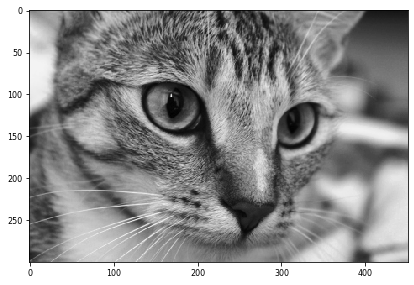

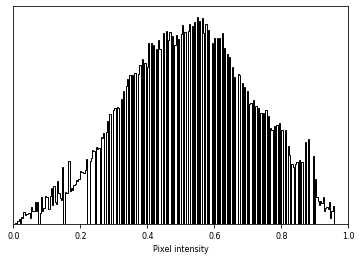

In [ ]:
# выводим получившееся изображение и его гистограмму
plot_img(transformed_pic)

0 0
1 0
2 0
3 0
4 1
5 3
6 4
7 6
8 7
9 8
10 8
11 9
12 9
13 10
14 10
15 11
16 11
17 12
18 12
19 13
20 14
21 14
22 15
23 16
24 17
25 17
26 18
27 19
28 19
29 20
30 21
31 21
32 22
33 23
34 24
35 24
36 25
37 25
38 26
39 26
40 27
41 28
42 28
43 29
44 29
45 30
46 31
47 31
48 32
49 33
50 34
51 34
52 35
53 36
54 37
55 38
56 38
57 39
58 40
59 41
60 42
61 42
62 43
63 44
64 45
65 46
66 47
67 48
68 49
69 50
70 51
71 52
72 53
73 54
74 55
75 56
76 58
77 59
78 60
79 61
80 63
81 64
82 65
83 67
84 68
85 69
86 71
87 72
88 74
89 76
90 77
91 79
92 80
93 82
94 84
95 86
96 87
97 89
98 91
99 93
100 95
101 96
102 98
103 100
104 102
105 103
106 105
107 107
108 109
109 111
110 112
111 114
112 116
113 118
114 119
115 121
116 123
117 124
118 126
119 128
120 129
121 131
122 133
123 134
124 136
125 138
126 140
127 142
128 144
129 145
130 147
131 149
132 151
133 153
134 155
135 157
136 159
137 161
138 163
139 165
140 167
141 169
142 171
143 172
144 174
145 176
146 178
147 180
148 181
149 183
150 185
151 187
152 188
15

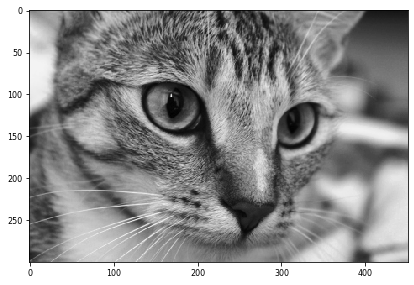

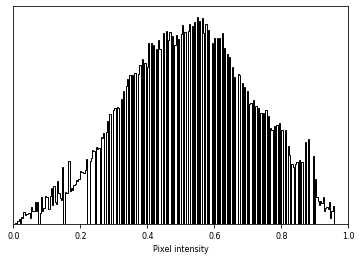

In [ ]:
transform_image_by_function(pic_high_detail, triangular_func, 4.15) # я хз как вычислить коэффициент, подбирал его вручную, для изображения с котом остановился на 4.15

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 2
8 3
9 4
10 6
11 8
12 9
13 9
14 10
15 11
16 12
17 12
18 13
19 14
20 15
21 16
22 17
23 18
24 19
25 20
26 21
27 21
28 22
29 23
30 23
31 24
32 24
33 25
34 25
35 26
36 26
37 26
38 27
39 27
40 28
41 28
42 28
43 29
44 29
45 30
46 30
47 31
48 31
49 31
50 32
51 32
52 33
53 34
54 34
55 34
56 35
57 35
58 36
59 36
60 37
61 38
62 38
63 39
64 40
65 42
66 43
67 45
68 46
69 48
70 50
71 51
72 53
73 55
74 56
75 58
76 59
77 60
78 62
79 63
80 64
81 65
82 67
83 68
84 69
85 70
86 71
87 72
88 74
89 75
90 76
91 77
92 79
93 80
94 81
95 83
96 84
97 86
98 87
99 89
100 90
101 92
102 93
103 95
104 97
105 99
106 100
107 102
108 104
109 107
110 109
111 111
112 114
113 117
114 120
115 123
116 126
117 129
118 133
119 136
120 139
121 142
122 145
123 147
124 149
125 152
126 154
127 156
128 158
129 160
130 162
131 163
132 165
133 166
134 168
135 169
136 170
137 172
138 173
139 174
140 175
141 176
142 177
143 178
144 179
145 180
146 181
147 182
148 183
149 184
150 185
151 186
152 187
153 18

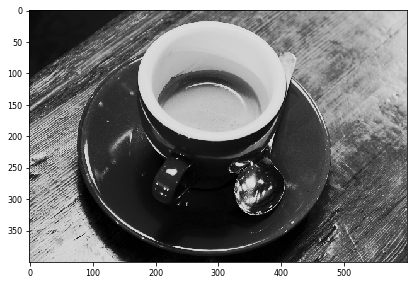

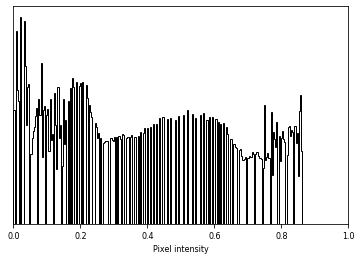

In [ ]:
transform_image_by_function(pic_low_detail, triangular_v_func, 7.3)
